In [18]:
# First, as always we import

from tensorflow import keras
import sklearn
from sklearn import decomposition
import numpy as np
import librosa
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

from src.VoiceModule import VoiceModule

In [4]:
# Here I setup pathes and variables
folder_path = "../../data"
emotion_list = ["calm", "happy", "angry", "fearful", "surprised", "sad"]
# This will be usefull to get the label name from the one_hot vector
# The last argument is the classifier but we set it at none because we won't need one
vm = VoiceModule("emotion", emotion_list, None)

X_file = f"x_{'_'.join(emotion_list)}-{vm._name}.npy"
Y_file = f"y_{'_'.join(emotion_list)}-{vm._name}.npy"


In [5]:
# Now we load the data
"""
    This numpy file has been generated with other jupyter notebooks
    It's format is: [[
    mfcc
    ]]
"""
X, Y = np.load(X_file), np.load(Y_file)


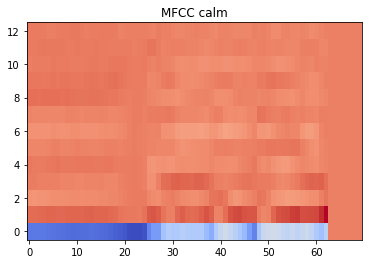

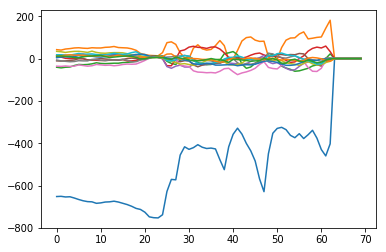

Everything is good :D


In [6]:
# Here we print one sample to see if everything is good
mfcc_feat = X[0]

ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC ' + vm.get_label_from_vector(Y[0])[0])
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)
plt.show()
print("Everything is good :D")

happy


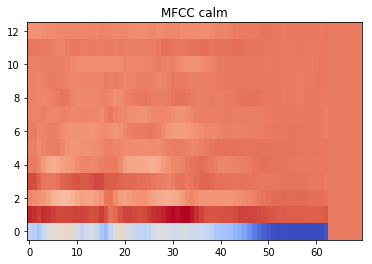

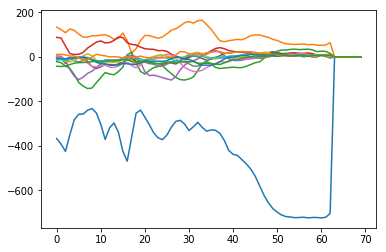

In [7]:
print(vm.get_label_from_vector(Y[400])[0])
mfcc_feat = X[400]
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC ' + vm.get_label_from_vector(Y[0])[0])
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)
plt.show()


In [8]:
# Now I will do a PCA on the data
#To perform PCA 
X_mean = np.mean(X, axis=2)
print(X_mean.shape)
pca = decomposition.PCA(n_components=2)
pca.fit(X_mean)
X_pca = pca.transform(X_mean)

(1329, 70)


(1329, 6)
(1329,) 0 1


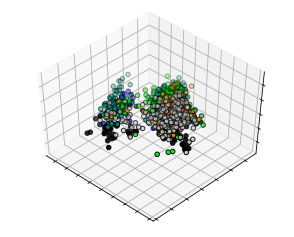

In [9]:
# Now we display it

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

print(Y.shape)
y = np.argmax(Y, axis=1)
print(y.shape, y[0], y[400])
# Reorder the labels to have colors matching the cluster results
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [10]:
# Now I will do k-mean see if we can find some cluster


kmeans = sklearn.cluster.KMeans(init='k-means++', n_clusters=6, n_init=10)
kmeans.fit(X_mean)


KMeans(n_clusters=6)

In [35]:
a = False
i = 0
spl_x = [[], [], [], [], [], []]
for i, e_y in enumerate(y):
    spl_x[e_y].append(X[i])

mean_list = []
sd_list = []
for i in range(0, 6):
    mean_list.append(np.mean(spl_x[i], axis=0))
    sd_list.append(np.std(spl_x[i], axis=0))
    print(f"{emotion_list[i]}: standard deviation: {round(np.linalg.norm(sd_list[-1]))}")

# distance between every barycenters
dist_all_means = list(map(lambda x: np.linalg.norm(x[0] - x[1]), itertools.combinations(mean_list, 2)))
for emotion_names, dist in zip(itertools.combinations(emotion_list, 2), dist_all_means):
    print(f"{emotion_names[0]} - {emotion_names[1]} = {round(dist)}")

calm: standard deviation: 1311
happy: standard deviation: 1188
angry: standard deviation: 1594
fearful: standard deviation: 1271
surprised: standard deviation: 984
sad: standard deviation: 1258
calm - happy = 1199
calm - angry = 1762
calm - fearful = 1345
calm - surprised = 1098
calm - sad = 500
happy - angry = 777
happy - fearful = 191
happy - surprised = 323
happy - sad = 719
angry - fearful = 673
angry - surprised = 1079
angry - sad = 1350
fearful - surprised = 445
fearful - sad = 866
surprised - sad = 620
